In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 93s 1us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.2)

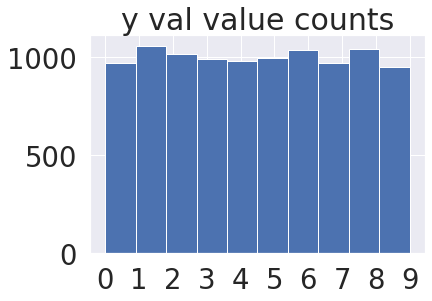

In [ ]:
plt.hist(y_val)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.title("y val value counts")
plt.show()

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:
y_train.shape

(40000, 1)

In [ ]:
lst = []
for i,im in enumerate(y_train):
  if im==1:
    lst.append(i)
print(lst)
lst = np.array(lst)

[6, 15, 21, 46, 56, 57, 65, 97, 99, 121, 125, 139, 141, 154, 159, 163, 175, 186, 188, 190, 191, 213, 215, 218, 222, 234, 242, 247, 248, 258, 260, 271, 275, 277, 294, 296, 297, 316, 328, 335, 336, 338, 349, 355, 356, 360, 371, 410, 412, 417, 422, 430, 443, 445, 448, 454, 468, 473, 479, 481, 482, 486, 490, 494, 495, 498, 500, 512, 572, 593, 596, 599, 613, 617, 625, 633, 649, 683, 697, 702, 734, 748, 760, 766, 769, 789, 795, 813, 882, 890, 892, 897, 909, 913, 921, 926, 930, 934, 947, 967, 971, 986, 987, 1006, 1043, 1045, 1056, 1068, 1080, 1100, 1119, 1131, 1136, 1151, 1182, 1187, 1196, 1201, 1205, 1207, 1222, 1229, 1232, 1237, 1239, 1254, 1264, 1283, 1285, 1311, 1316, 1321, 1351, 1355, 1380, 1382, 1387, 1388, 1404, 1405, 1417, 1423, 1426, 1432, 1435, 1439, 1470, 1478, 1492, 1525, 1538, 1561, 1570, 1575, 1587, 1593, 1598, 1599, 1620, 1634, 1653, 1662, 1675, 1691, 1711, 1718, 1729, 1732, 1737, 1749, 1756, 1768, 1786, 1799, 1801, 1820, 1838, 1847, 1849, 1850, 1853, 1866, 1868, 1878, 1883, 18

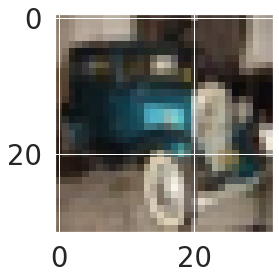

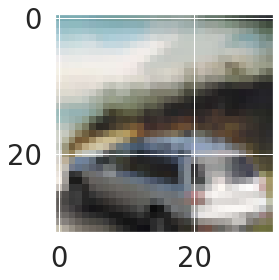

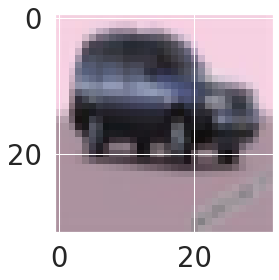

In [ ]:
for i in range(3):
  plt.imshow(x_train[lst[i]])
  plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
  rescale = 1./255.,
  width_shift_range= 0.2,
  zoom_range = 0.3,
  horizontal_flip = True
)
val_datagen = ImageDataGenerator(
  rescale = 1./255.
)
test_datagen = ImageDataGenerator(
  rescale = 1./255.
)

In [ ]:
train_generator = train_datagen.flow(
    x_train,y_train
)
validation_generator = val_datagen.flow(
    x_val,y_val
)
test_genrator = test_datagen.flow(
    x_test,y_test
)

# Modeling (Fine Tuning)
* VGG16 trainable = True
* VGG16 trainable[@:] = True
* VGG16 self code

#### VGG16 trainable = True

In [ ]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
model.trainable = True
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
top_model = keras.Sequential()
top_model.add(model)
top_model.add(layers.Flatten())
top_model.add(layers.Dense(256, activation='relu'))
top_model.add(layers.Dense(10, activation='softmax'))

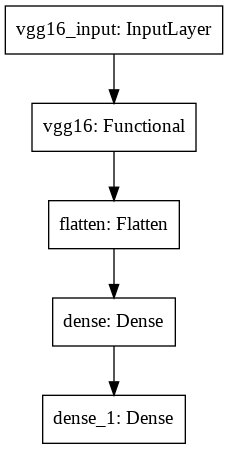

In [ ]:
plot_model(top_model)

In [ ]:
top_model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_Vgg = top_model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
39/39 [==============================] - 36s 48ms/step - loss: 2.4759 - sparse_categorical_accuracy: 0.1010 - val_loss: 2.3256 - val_sparse_categorical_accuracy: 0.0833
Epoch 2/500
39/39 [==============================] - 1s 32ms/step - loss: 2.3413 - sparse_categorical_accuracy: 0.1009 - val_loss: 2.2733 - val_sparse_categorical_accuracy: 0.0764
Epoch 3/500
39/39 [==============================] - 1s 32ms/step - loss: 2.2640 - sparse_categorical_accuracy: 0.1425 - val_loss: 2.1216 - val_sparse_categorical_accuracy: 0.1389
Epoch 4/500
39/39 [==============================] - 1s 32ms/step - loss: 2.1193 - sparse_categorical_accuracy: 0.1398 - val_loss: 2.1427 - val_sparse_categorical_accuracy: 0.1597
Epoch 5/500
39/39 [==============================] - 1s 32ms/step - loss: 2.1245 - sparse_categorical_accuracy: 0.1621 - val_loss: 2.0616 - val_sparse_categorical_accuracy: 0.1701
Epoch 6/500
39/39 [==============================] - 1s 32ms/step - loss: 2.0423 - sparse_categoric

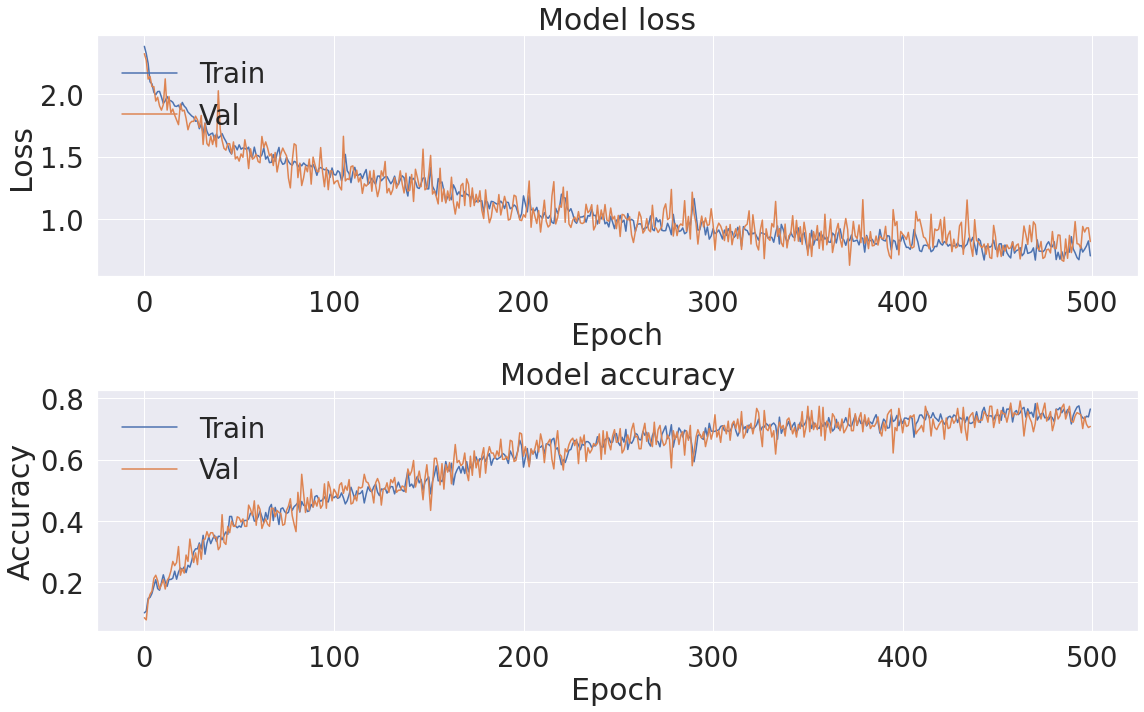

In [ ]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Vgg.history['loss'])
ax[0].plot(history_Vgg.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Vgg.history['sparse_categorical_accuracy'])
ax[1].plot(history_Vgg.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [ ]:
top_model.evaluate(test_genrator,batch_size=32)

313/313 [==============================] - 3s 10ms/step - loss: 0.8406 - sparse_categorical_accuracy: 0.7367


[0.8405572175979614, 0.7366999983787537]

#### VGG16 trainable[@:] = True

In [ ]:
model2 = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
model2.trainable = False
model2.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [ ]:
top_model2 = keras.Sequential()
top_model2.add(model2)
top_model2.add(layers.Flatten())
top_model2.add(layers.Dense(256, activation='relu'))
top_model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
top_model2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_Vgg2_1 = top_model2.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=200,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
39/39 [==============================] - 32s 34ms/step - loss: 2.2434 - sparse_categorical_accuracy: 0.1788 - val_loss: 1.8638 - val_sparse_categorical_accuracy: 0.3438
Epoch 2/200
39/39 [==============================] - 1s 19ms/step - loss: 1.8905 - sparse_categorical_accuracy: 0.3271 - val_loss: 1.7228 - val_sparse_categorical_accuracy: 0.4097
Epoch 3/200
39/39 [==============================] - 1s 19ms/step - loss: 1.7671 - sparse_categorical_accuracy: 0.3786 - val_loss: 1.6768 - val_sparse_categorical_accuracy: 0.3924
Epoch 4/200
39/39 [==============================] - 1s 19ms/step - loss: 1.6552 - sparse_categorical_accuracy: 0.4354 - val_loss: 1.5647 - val_sparse_categorical_accuracy: 0.4514
Epoch 5/200
39/39 [==============================] - 1s 19ms/step - loss: 1.6941 - sparse_categorical_accuracy: 0.4040 - val_loss: 1.4957 - val_sparse_categorical_accuracy: 0.4792
Epoch 6/200
39/39 [==============================] - 1s 19ms/step - loss: 1.6140 - sparse_categoric

In [ ]:
for layer in model2.layers[4:]:
  layer.trainable = True

In [ ]:
top_model2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history_Vgg2_2 = top_model2.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator)//32,
    epochs=300,
    validation_data=validation_generator,
    validation_steps = len(validation_generator)//32
)

Epoch 1/300
 9/39 [=====>........................] - ETA: 0s - loss: 1.1274 - sparse_categorical_accuracy: 0.6285

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


39/39 [==============================] - 1s 21ms/step - loss: 1.1555 - sparse_categorical_accuracy: 0.5962 - val_loss: 1.1622 - val_sparse_categorical_accuracy: 0.6007
Epoch 2/300
39/39 [==============================] - 1s 20ms/step - loss: 1.1612 - sparse_categorical_accuracy: 0.5833 - val_loss: 1.1337 - val_sparse_categorical_accuracy: 0.6354
Epoch 3/300
39/39 [==============================] - 1s 20ms/step - loss: 1.1549 - sparse_categorical_accuracy: 0.5817 - val_loss: 1.2800 - val_sparse_categorical_accuracy: 0.6042
Epoch 4/300
39/39 [==============================] - 1s 19ms/step - loss: 1.1983 - sparse_categorical_accuracy: 0.5905 - val_loss: 1.1709 - val_sparse_categorical_accuracy: 0.5903
Epoch 5/300
39/39 [==============================] - 1s 19ms/step - loss: 1.0862 - sparse_categorical_accuracy: 0.6178 - val_loss: 1.0132 - val_sparse_categorical_accuracy: 0.6111
Epoch 6/300
39/39 [==============================] - 1s 19ms/step - loss: 1.1385 - sparse_categorical_accuracy: 

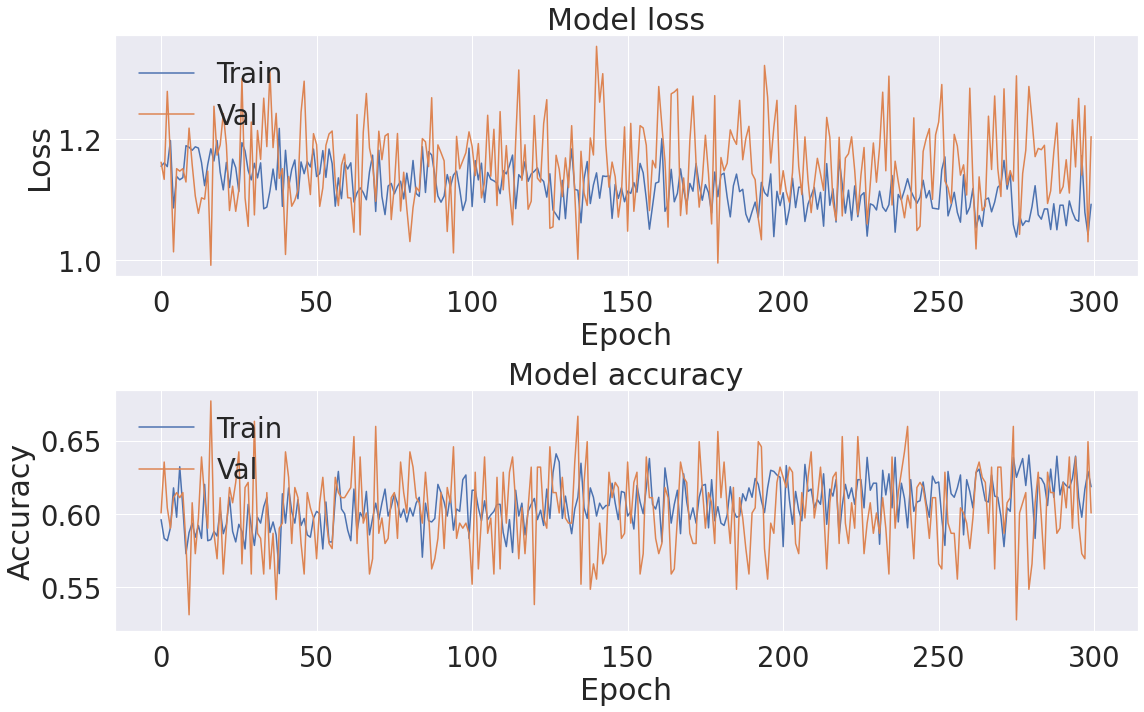

In [ ]:
f,ax = plt.subplots(2,1,figsize=(16,10))
ax[0].plot(history_Vgg2_2.history['loss'])
ax[0].plot(history_Vgg2_2.history['val_loss'])
ax[0].set_title('Model loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Val'], loc='upper left')

ax[1].plot(history_Vgg2_2.history['sparse_categorical_accuracy'])
ax[1].plot(history_Vgg2_2.history['val_sparse_categorical_accuracy'])
ax[1].set_title('Model accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Val'], loc='upper left')

f.tight_layout()
plt.show()

In [ ]:
top_model2.evaluate(test_genrator,batch_size=32)

313/313 [==============================] - 2s 7ms/step - loss: 1.1479 - sparse_categorical_accuracy: 0.6053


[1.1478887796401978, 0.6053000092506409]

#### VGG16 self code

In [14]:

def self_vgg16():
  inputs = layers.Input(shape=(32,32,3))

  net = layers.Conv2D(64,3,1,padding='same',activation='relu')(inputs)
  net = layers.Conv2D(64,3,1,padding='same',activation='relu')(net)
  net = layers.MaxPool2D((2,2))(net)
  net = layers.Conv2D(128,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(128,3,1,padding='same',activation='relu')(net)
  net = layers.MaxPool2D((2,2))(net)
  net = layers.Conv2D(256,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(256,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(256,3,1,padding='same',activation='relu')(net)
  net = layers.MaxPool2D((2,2))(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.MaxPool2D((2,2))(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.Conv2D(512,3,1,padding='same',activation='relu')(net)
  net = layers.MaxPool2D((2,2))(net)

  net = layers.Flatten()(net)
  net = layers.Dense(512, activation='relu')(net)
  net = layers.Dense(10, activation='softmax')(net)

  outputs = net
  model=tf.keras.Model(inputs=inputs,outputs=outputs,name='self_made_VGG16')
  return model

In [15]:
self_made_VGG16 = self_vgg16()

In [16]:
self_made_VGG16 = self_vgg16().summary()

Model: "self_made_VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)     